<a href="https://colab.research.google.com/github/nomanGondal/LogisticRegression/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Logistic Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,recall_score,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

In [ ]:
df=sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
Y=df['survived']
X=df.drop('survived',axis=1)
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       891 non-null    int64   
 1   sex          891 non-null    int64   
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  deck         203 non-null    category
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 73.7+ KB


In [ ]:
df.drop(['survived'],axis=1,inplace=True)
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


In [ ]:
df['age'].fillna(df['age'].median(),inplace=True)

/tmp/ipython-input-2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [ ]:
df['age'].fillna(df['age'].median(),inplace=True)

In [ ]:
df.drop(['embarked'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pclass      891 non-null    int64   
 1   sex         891 non-null    object  
 2   age         891 non-null    float64 
 3   sibsp       891 non-null    int64   
 4   parch       891 non-null    int64   
 5   fare        891 non-null    float64 
 6   class       891 non-null    category
 7   who         891 non-null    object  
 8   adult_male  891 non-null    bool    
 9   alive       891 non-null    object  
 10  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(3)
memory usage: 58.6+ KB


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        le = LabelEncoder()   # use a variable like 'le'
        df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
df.head()

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
0,3,1,22.0,1,0,7.2500,2,1,True,0,False
1,1,0,38.0,1,0,71.2833,0,2,False,1,False
2,3,0,26.0,0,0,7.9250,2,2,False,1,True
3,1,0,35.0,1,0,53.1000,0,2,False,1,False
4,3,1,35.0,0,0,8.0500,2,1,True,0,True


In [ ]:
X=df

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
class MyLogisticRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr                # learning rate
        self.n_iters = n_iters      # number of iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
     z = np.array(z, dtype=np.float64)
     return 1 / (1 + np.exp(-z))
    def fit(self, X, y):
        """Train the model using Gradient Descent"""
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            # Linear prediction
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid
            y_pred = self.sigmoid(linear_model)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        """Return predicted probabilities"""
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        """Return class labels (0 or 1)"""
        y_pred_prob = self.predict_proba(X)
        return np.where(y_pred_prob >= 0.5, 1, 0)


In [ ]:
model=MyLogisticRegression(lr=0.1, n_iters=1000)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
#evaluation metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        62

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
print('confusion matrix',confusion_matrix(y_test,y_pred))
print('accuracy score ',accuracy_score(y_test,y_pred))
print('Recall score' , recall_score(y_test,y_pred))
print('Precision score' , precision_score(y_test,y_pred))

confusion matrix [[  3 114]
 [  0  62]]
accuracy score  0.36312849162011174
Recall score 1.0
Precision score 0.3522727272727273


In [ ]:
#KNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,recall_score,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

In [ ]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X=df.drop('species',axis=1)
Y=df['species']

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knn.predict([[3,3.2,4,2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#print pridiction
print(y_pred)

['versicolor']


# **Train test split**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#testing
y_pred=model.predict(x_test)

In [ ]:
print('confusion matrix',confusion_matrix(y_test,y_pred))
print('accuracy score ',accuracy_score(y_test,y_pred))
print('Recall score' , recall_score(y_test,y_pred,average='micro'))
print('Precision score' , precision_score(y_test,y_pred,average='micro'))


confusion matrix [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy score  1.0
Recall score 1.0
Precision score 1.0


<Axes: >

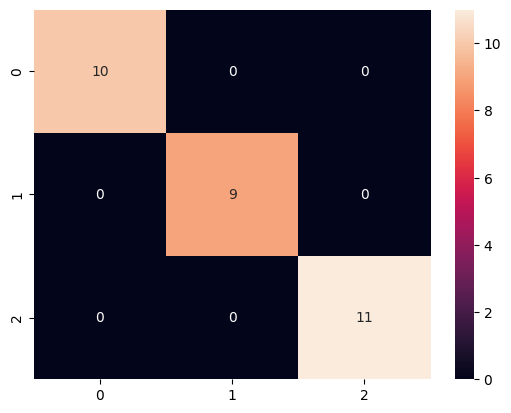

In [ ]:
#heatmap
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


# **KNN for regression**

In [ ]:
df2=sns.load_dataset('tips')
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
X=df2.drop(['tip'],axis=1)
Y=df2['tip']

In [ ]:
#encode X
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))


In [ ]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
#knn
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
#evalution matric for knn regression
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 1.0155619047619049
R-squared: 0.18753185134795147
